# Single Droplet (Density, Deposition, Time)

In [1]:
from load_trajectories import get_timestamps, load_trajectories, get_unique_SDs
# Using the NPL 2024a kernel
import os
import os.path

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
# filepaths for trajectories
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200'

In [9]:
# THIS HAS 15 SECONDS
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 4 timestamps (every 1 minute)
coarse_timestamps = timestamps[0::4]
#coarse_timestamps = timestamps

# only look at 10 superdroplets 
Ns = 10
unique_superdroplets = get_unique_SDs(dirpath, coarse_timestamps[0])
first_Ns = unique_superdroplets[0:Ns]

print(coarse_timestamps)
print(first_Ns)
trajs = load_trajectories(dirpath, times=coarse_timestamps,
                         num_timesteps = 3, 
                         Ns_array = first_Ns)

[5100 5160 5220 5280 5340 5400 5460 5520 5580 5640 5700 5760 5820 5880
 5940 6000 6060 6120 6180 6240 6300 6360 6420 6480 6540 6600 6660 6720
 6780 6840 6900 6960 7020 7080 7140 7200]
[ 409  551  781  872 1422 1464 1934 3033 3531 3883]
Loading trajectories for time 5100 
Loading trajectories for time 5160 
Loading trajectories for time 5220 


In [10]:
trajs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,257.08756,376.495430,9206.9901,0.0,0.0,4.152454e-13,0.000006,0.000006,202.61799,108.18,15177056256,ICE,409,0.0,1,5100
551,421.27386,208.028410,9724.6130,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00263,99.55,74482008064,ICE,551,0.0,1,5100
781,417.36142,423.576800,9656.4441,0.0,0.0,7.027485e-14,0.000019,0.000019,358.66841,358.64,58047827968,ICE,781,0.0,1,5100
872,226.87752,372.240120,9514.6481,0.0,0.0,1.622385e-13,0.000045,0.000045,289.55341,289.55,35479605248,ICE,872,0.0,1,5100
1422,483.30685,37.490361,9622.7620,0.0,0.0,2.185584e-13,0.000017,0.000017,410.53663,410.45,28040101888,ICE,1422,0.0,1,5100
1464,329.97828,361.271450,9653.8807,0.0,0.0,1.477063e-15,0.000007,0.000007,700.53131,712.73,50299813888,ICE,1464,0.0,1,5100
1934,341.09129,107.736660,9231.7479,0.0,0.0,2.507824e-13,0.000070,0.000070,203.18216,203.18,24888346624,ICE,1934,0.0,1,5100
3033,479.67710,468.744710,9588.0103,0.0,0.0,1.013003e-14,0.000012,0.000012,315.46694,315.45,69965635584,ICE,3033,0.0,1,5100
3531,424.22652,159.671500,9637.3260,0.0,0.0,5.652341e-14,0.000046,0.000046,200.00124,151.36,63349731328,ICE,3531,0.0,1,5100


In [11]:
trajsValid = trajs[trajs["z[m]"] > 0]
trajsValid

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,257.08756,376.495430,9206.9901,0.0,0.0,4.152454e-13,0.000006,0.000006,202.61799,108.18,15177056256,ICE,409,0.0,1,5100
551,421.27386,208.028410,9724.6130,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00263,99.55,74482008064,ICE,551,0.0,1,5100
781,417.36142,423.576800,9656.4441,0.0,0.0,7.027485e-14,0.000019,0.000019,358.66841,358.64,58047827968,ICE,781,0.0,1,5100
872,226.87752,372.240120,9514.6481,0.0,0.0,1.622385e-13,0.000045,0.000045,289.55341,289.55,35479605248,ICE,872,0.0,1,5100
1422,483.30685,37.490361,9622.7620,0.0,0.0,2.185584e-13,0.000017,0.000017,410.53663,410.45,28040101888,ICE,1422,0.0,1,5100
1464,329.97828,361.271450,9653.8807,0.0,0.0,1.477063e-15,0.000007,0.000007,700.53131,712.73,50299813888,ICE,1464,0.0,1,5100
1934,341.09129,107.736660,9231.7479,0.0,0.0,2.507824e-13,0.000070,0.000070,203.18216,203.18,24888346624,ICE,1934,0.0,1,5100
3033,479.67710,468.744710,9588.0103,0.0,0.0,1.013003e-14,0.000012,0.000012,315.46694,315.45,69965635584,ICE,3033,0.0,1,5100
3531,424.22652,159.671500,9637.3260,0.0,0.0,5.652341e-14,0.000046,0.000046,200.00124,151.36,63349731328,ICE,3531,0.0,1,5100


In [6]:
trajs['status[-]'].values

array(['ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE',
       'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE',
       'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE', 'ICE',
       'ICE', 'ICE', 'ICE'], dtype=object)

In [13]:
# dropletIDs = trajsValid.loc[[941890922, 941891358, 941891618, 973233334, 941892406]]
# # updatedID = dropletIDs.reset_index()
# dropletIDs

In [17]:
df = trajsValid.reset_index()
updatedIDArray = pd.unique(df['rk_deact'])
updatedIDArray

array([ 409,  551,  781,  872, 1422, 1464, 1934, 3033, 3531, 3883])

TypeError: _LocationIndexer.__call__() got an unexpected keyword argument 'rk_deact'

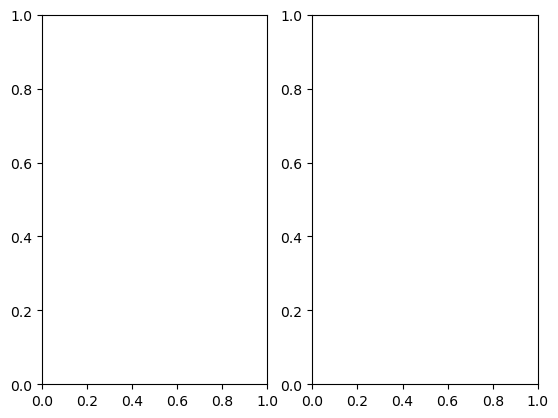

In [24]:
updatedID = updatedIDArray.to_xarray()
updatedID

fig, (ax1, ax2) = plt.subplots(1, 2)

for id in updatedIDArray:
    time = updatedID["time"].sel(rk_deact=id)
    density = updatedID["density(droplet/ice)[kg/m3]"].sel(rk_deact=id)
    depositionDensity =  updatedID["rhod [kg/m3]"].sel(rk_deact=id)
    rads = 1e6 * updatedID["radius_eq(ice)[m]"].sel(rk_deact=id)

    #plot
    ax1.set_ylabel("Density(Droplet/Ice)[kg/m3]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, density, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
id = updatedIDArray[1]
df_id = updatedID[updatedID['rk_deact'] == id]
density = df_id['density(droplet/ice)[kg/m3]']
density

# Radius x Time

In [5]:
updatedID = dropletIDs.to_xarray()
updatedID

NameError: name 'dropletIDs' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)


for id in updatedIDArray:
    time = updatedID["time"].sel(rk_deact=id)
    radius = updatedID["radius_pol(ice)[m]"].sel(rk_deact=id)
    rads = 1e6 * updatedID["radius_pol(ice)[m]"].sel(rk_deact=id)
    depositionDensity =  updatedID["rhod [kg/m3]"].sel(rk_deact=id)

    #plot
    ax1.set_ylabel("Polar Radius(Droplet/Ice)[n]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, radius, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)
    
plt.tight_layout()
plt.show()

# Number of Superdroplets over Time

In [ ]:
trajsValid

In [ ]:
allIDs = trajsValid.reset_index()
allIDs

In [ ]:
updatedRK_DEACT = pd.unique(allIDs['rk_deact'])
updatedRK_DEACT

In [ ]:
for id in updatedRK_DEACT:
    time = allIDs["time"].sel(rk_deact=id)